# Preprocessing


*Remove misclassified data and extraneous columns*


*Split data into training and testing sets*

In [5]:
import pandas as pd
import numpy as np
import itertools
import random as rd
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix,f1_score

*Plotting Learning Curve Function*

In [6]:
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=1, train_sizes=np.linspace(.1, 1.0, 5)):
    """
    Generate a simple plot of the test and training learning curve.

    Parameters
    ----------
    estimator : object type that implements the "fit" and "predict" methods
        An object of that type which is cloned for each validation.

    title : string
        Title for the chart.

    X : array-like, shape (n_samples, n_features)
        Training vector, where n_samples is the number of samples and
        n_features is the number of features.

    y : array-like, shape (n_samples) or (n_samples, n_features), optional
        Target relative to X for classification or regression;
        None for unsupervised learning.

    ylim : tuple, shape (ymin, ymax), optional
        Defines minimum and maximum yvalues plotted.

    cv : int, cross-validation generator or an iterable, optional
        Determines the cross-validation splitting strategy.
        Possible inputs for cv are:
          - None, to use the default 3-fold cross-validation,
          - integer, to specify the number of folds.
          - An object to be used as a cross-validation generator.
          - An iterable yielding train/test splits.

        For integer/None inputs, if ``y`` is binary or multiclass,
        :class:`StratifiedKFold` used. If the estimator is not a classifier
        or if ``y`` is neither binary nor multiclass, :class:`KFold` is used.

        Refer :ref:`User Guide <cross_validation>` for the various
        cross-validators that can be used here.

    n_jobs : integer, optional
        Number of jobs to run in parallel (default 1).
    """
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt


*Confusion Matrix Plotting*

In [85]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')


In [86]:
data = pd.read_csv("default of credit card clients.csv")

In [87]:
data = data.drop(['ID'],axis=1)
data = data[data.MARRIAGE != 3]
data = data[data.MARRIAGE != 0]
data = data[data.EDUCATION < 3]
data = data[data.EDUCATION != 0]
data.loc[:,['SEX','EDUCATION','MARRIAGE']] -= 1
data.loc[:,'MARRIAGE'] ^= 1

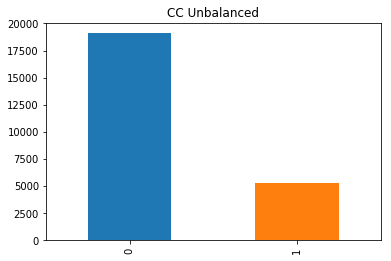

In [88]:
y = data['default payment next month']
X = data.drop(['default payment next month'], axis=1)
y.value_counts().plot(kind='bar',title ='CC Unbalanced')

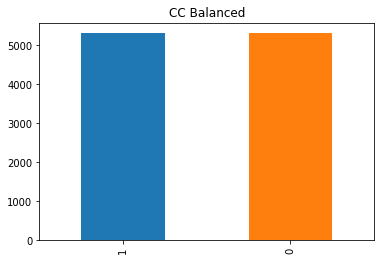

In [89]:
c0, c1 = y.value_counts()
data0 = data[y==0]
data1 = data[y==1]

data0under = data0.sample(c1)

dataUnder = pd.concat([data0under, data1],axis=0)
dataUnder.describe()

y = dataUnder['default payment next month']
X = dataUnder.drop(['default payment next month'], axis=1)
y.value_counts().plot(kind='bar',title='CC Balanced')

**Scaled data**

In [106]:
train_X, val_X, train_y, val_y = train_test_split(X, y, random_state = 0)

In [107]:
from sklearn.preprocessing import StandardScaler  
scaler = StandardScaler()  
# Don't cheat - fit only on training data
scaler.fit(train_X)  
train_Xs = scaler.transform(train_X)  
# apply same transformation to test data
val_Xs = scaler.transform(val_X)  

## Neural Networks

**Benchmarks**

*Backpropagation*

*Initial Randomization*

In [123]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV
nn = MLPClassifier(hidden_layer_sizes=(52,),alpha=0.01)
print(nn)

MLPClassifier(activation='relu', alpha=0.01, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(52,), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=None,
       shuffle=True, solver='adam', tol=0.0001, validation_fraction=0.1,
       verbose=False, warm_start=False)


In [124]:
nn.fit(train_Xs, train_y)
backpropW = nn.coefs_
backpropI = nn.intercepts_

In [125]:
print("Backpropagation:",nn.score(val_Xs, val_y))
backpropT = nn.score(val_Xs, val_y)
backprop = nn.score(val_Xs, val_y)

Backpropagation: 0.7064807837226827


*Initial Randomization* for all optimization techniques

In [126]:
from numpy import random as npr
l0 = len(backpropW[0])
l00 = len(backpropW[0][0])
l1 = len(backpropW[1])
Rweights = [2 * npr.random_sample((l0,l00)) - 1, 2 * npr.random_sample(l1) - 1]

In [136]:
nn.coefs_ = Rweights
RweightsR = Rweights
RweightsB = Rweights
print("Random Initialization:",nn.score(train_Xs, train_y))

Random Initialization: 0.5582768148706355


**Randomized Hill Climbing**

In [128]:
def scoring(n,cmax, bestNN):
    nn.coefs_ = n 
    evalF = nn.score(train_Xs, train_y)
    if evalF > cmax:
        cmax = evalF
        bestNN = n
    return cmax, bestNN

In [129]:
currentMax = nn.score(train_Xs, train_y)
currentMaxR = currentMax
currentMaxB = currentMax
print(currentMax)
def rhc(q, limit, Rweights, bestNN, currentMax):
    t = 0 
    curve = []
    while t < limit: #number of random restarts
        current = Rweights[:]
        counter = 0
        betterNeighbors = True
        while betterNeighbors:
            for i in itertools.chain.from_iterable(current): #checks all neighbors of current state
                i += .01 #increment by .01
                newMax, bestneighbor = scoring(current,currentMax, bestNN)
                i -= .02 #decrement by .01
                newMax, bestneighbor = scoring(current,newMax, bestNN)
                i += .01 #return to original weight
            if newMax > currentMax:
                currentMax = newMax 
                current = bestneighbor 
            else:
                betterNeighbors = False #reached an optimum, stop climbing
        Rweights = [2 * npr.random_sample((l0,l00)) - 1, 2 * npr.random_sample(l1) - 1] #random restart
        t += 1
        curve.append(currentMax)
    return curve

0.5582768148706355


In [133]:
tinyRHC = rhc(.001,1000, Rweights, Rweights, currentMax)
rhcTt = nn.score(train_Xs, train_y)
rhcScoreT = nn.score(val_Xs, val_y)

In [131]:
regRHC = rhc(.01,1000, RweightsR, RweightsR, currentMaxR)
rhcT = nn.score(train_Xs,train_y)
rhcScore = nn.score(val_Xs, val_y)

In [132]:
bigRHC = rhc(.1,1000, RweightsB, RweightsB, currentMaxB)
rhcTb = nn.score(train_Xs, train_y)
rhcScoreB = nn.score(val_Xs, val_y)

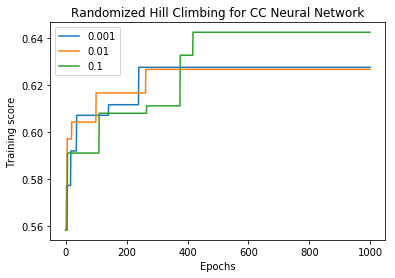

In [134]:
plt.plot(tinyRHC, label="0.001")
plt.plot(regRHC, label="0.01")
plt.plot(bigRHC, label="0.1")
plt.xlabel("Epochs")
plt.ylabel("Training score")
plt.title("Randomized Hill Climbing for CC Neural Network")
plt.legend()

**Simulated Annealing**

In [196]:
from random import random,randint

def cost(n):
    nn.coefs_ = n 
    evalF = nn.score(train_Xs, train_y)
    return (1/evalF)

def neighbor(current):
    r = randint(0,74)
    count = 0
    for i in itertools.chain.from_iterable(current): 
        if count == r:
            i += (2 * rd.random() - 1) #random move
        count += 1
    return current

def acceptance_probability(o, n, T):
    a = np.exp((n-o)/T)
    if a > 1:
        a = 1
    return a

def anneal(sol, temp, cooling):
    old_cost = cost(sol)
    T = temp
    T_min = 0.00001
    alpha = cooling
    curve = []
    maxF = 0
    while T > T_min:
        i = 1
        while i <= 100:
            new_sol = neighbor(sol)
            new_cost = cost(new_sol)
            ap = acceptance_probability(old_cost, new_cost, T)
            if ap > random():
                sol = new_sol
                old_cost = new_cost
            i += 1
            tScore = 1/old_cost
            curve.append(tScore)
            if (tScore > maxF):
                maxF = tScore
        T = T*alpha
    return sol, maxF, curve

In [145]:
SAweights, perf, res = anneal(Rweights, 10, 0.35)
nn.coefs_ = SAweights
saT = nn.score(train_Xs, train_y)
SAscore = nn.score(val_Xs, val_y)

In [197]:
SAweights, perfR, resR = anneal(RweightsR, 10, 0.85)
nn.coefs_ = SAweights
saTR = nn.score(train_Xs, train_y)
SAscoreR = nn.score(val_Xs, val_y)

In [147]:
SAweights, perfB,resB = anneal(RweightsB, 10, 0.95)
nn.coefs_ = SAweights
saTB = nn.score(train_Xs, train_y)
SAscoreB = nn.score(val_Xs, val_y)

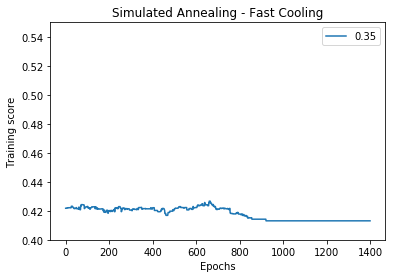

In [199]:
plt.plot(res,label = "0.35")
plt.xlabel("Epochs")
plt.ylabel("Training score")
plt.title("Simulated Annealing - Fast Cooling")
plt.ylim(.4,.55)
plt.legend()

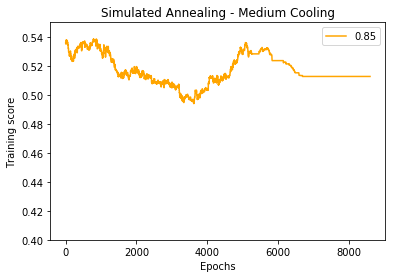

In [204]:
plt.plot(resR, label = "0.85", color="orange")
plt.xlabel("Epochs")
plt.ylabel("Training score")
plt.title("Simulated Annealing - Medium Cooling")
plt.ylim(.4,.55)
plt.legend()

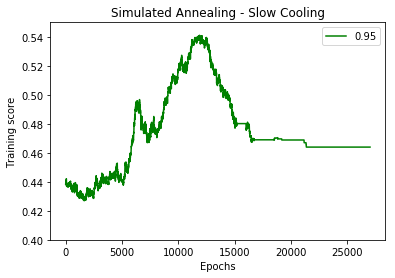

In [200]:
plt.plot(resB, label = "0.95", color="green")
plt.xlabel("Epochs")
plt.ylabel("Training score")
plt.title("Simulated Annealing - Slow Cooling")
plt.ylim(.4,.55)
plt.legend()

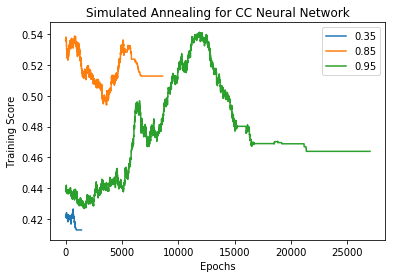

In [202]:
plt.plot(res, label="0.35")
plt.plot(resR, label="0.85")
plt.plot(resB, label="0.95")
plt.xlabel("Epochs")
plt.ylabel("Training Score")
plt.title("Simulated Annealing for CC Neural Network")
plt.legend()

In [203]:
print("Fast cooling")
print(perf)
print(SAscore)
print("0.85 rate")
print(perfR)
print(SAscoreR)
print("Slow cooling")
print(perfB)
print(SAscoreB)

Fast cooling
0.426651595076614
0.41785983421250944
0.85 rate
0.5385581512182869
0.527128862094951
Slow cooling
0.5410700828937453
0.524114544084401


**Genetic Algorithms**

In [161]:
import random
def create_population(count):
    pop = []
    for i in range(0, count):
        Rweights = [2 * npr.random_sample((l0,l00)) - 1,
                    2 * npr.random_sample(l1) - 1]
        nn.coefs_ = Rweights
        pop.append(nn)
    return pop

def breed(mother, father, mut):
    children = []
    for k in range(2):
        child = [2 * npr.random_sample((l0,l00)) - 1,
                    2 * npr.random_sample(l1) - 1]
        
        c = itertools.chain.from_iterable(child)
        m = itertools.chain.from_iterable(mother.coefs_)
        f = itertools.chain.from_iterable(father.coefs_)
        for i,j,k in zip(c,m,f):
            i = rd.choice([j,k])
        childNN = nn
        childNN.coefs_ = child
        if mut > rd.random():
            mutate(childNN)
        children.append(childNN)
    return children 

def mutate(nn):
    r = randint(0,74)
    count = 0
    for i in itertools.chain.from_iterable(nn.coefs_): 
        if count == r:
            i += (2 * rd.random() - 1) #random move
        count += 1

def evolve(pop, m):
    graded = [(fitness(nn), nn) for nn in pop]
    graded = [x[1] for x in sorted(graded, key=lambda x: x[0], reverse=True)]
    retain_len = int(len(graded)*0.5)
    parents = graded[:retain_len]
    
    for i in graded[retain_len:]:
        if 0.1 > rd.random():
            parents.append(i)
    for i in parents:
        if 0.2 > rd.random():
            i = mutate(i)
    
    parentsLength = len(parents)
    desiredLength = len(pop) - parentsLength
    children = []
    
    while len(children) < desiredLength:
        male = rd.randint(0, parentsLength-1)
        female = rd.randint(0, parentsLength-1)
        
        if male != female:
            male = parents[male]
            female = parents[female]
            babies = breed(male, female, m)
            for b in babies:
                if len(children) < desiredLength:
                    children.append(b)
                    
    parents.extend(children)
    return parents                    

def fitness(network):
    return nn.score(train_Xs, train_y)

In [162]:
networks = create_population(50)
curve = []
nCurve = []
for i in range(20):
    networks = evolve(networks, .1)
    scores = [f.score(train_Xs, train_y) for f in networks]
    nCurve.append(networks[scores.index(max(scores))])
    curve.append(max(scores))
networks = sorted(networks, key=lambda x: x.score(train_Xs, train_y))
print(max(curve))

0.6193167545842753


In [163]:
networks2 = create_population(50)
curve2 = []
nCurve2 = []
for i in range(20):
    networks2 = evolve(networks2, .4)
    scores2 = [f.score(train_Xs, train_y) for f in networks2]
    nCurve2.append(networks2[scores2.index(max(scores2))])
    curve2.append(max(scores2))
networks2 = sorted(networks2, key=lambda x: x.score(train_Xs, train_y))
print(max(curve2))

0.6027380055262497


In [164]:
networks3 = create_population(50)
curve3 = []
nCurve3 = []
for i in range(20):
    networks3 = evolve(networks, .8)
    scores3 = [f.score(train_Xs, train_y) for f in networks3]
    nCurve3.append(networks3[scores3.index(max(scores3))])
    curve3.append(max(scores3))
networks3 = sorted(networks3, key=lambda x: x.score(train_Xs, train_y))
print(max(curve3))

0.6083898517960311


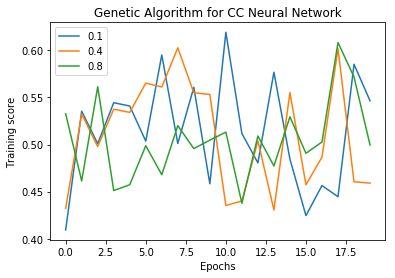

In [166]:
plt.plot(curve, label = "0.1")
plt.plot(curve2, label = "0.4")
plt.plot(curve3, label = "0.8")
plt.xlabel("Epochs")
plt.ylabel("Training score")
plt.title("Genetic Algorithm for CC Neural Network")
plt.legend()

In [183]:
gaScore = networks[curve.index(max(curve))].score(val_Xs, val_y)
gaT = networks[curve.index(max(curve))].score(train_Xs, train_y)
print(gaScore)
print(gaT)

0.4886963074604371
0.4994976136649083


In [184]:
gaScore2 = networks2[curve2.index(max(curve2))].score(val_Xs, val_y)
gaT2 = networks2[curve2.index(max(curve2))].score(train_Xs, train_y)
print(gaScore2)
print(gaT2)

0.4886963074604371
0.4994976136649083


In [185]:
gaScore3 = networks3[curve3.index(max(curve3))].score(val_Xs, val_y)
gaT3 = networks3[curve3.index(max(curve3))].score(train_Xs, train_y)
print(gaScore3)
print(gaT3)

0.4886963074604371
0.4994976136649083


**Comparisons**

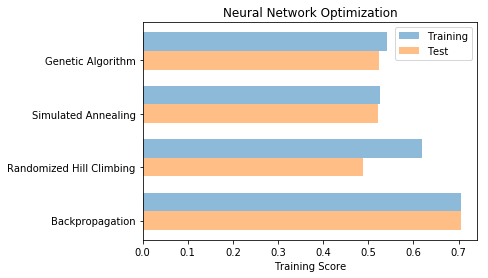

In [191]:
objects = ('Backpropagation', 'Randomized Hill Climbing', 'Simulated Annealing', 'Genetic Algorithm')
y_pos = np.arange(len(objects))
performance = [backprop, networks[0].score(val_Xs, val_y), rhcScoreB, SAscoreB]
training = [backpropT, max(curve), rhcTb, perfB]
plt.barh(y_pos+.35, training,0.35, align='center', alpha=0.5,label='Training')
plt.barh(y_pos, performance,0.35, align='center', alpha=0.5,label='Test')
plt.yticks(y_pos, objects)
plt.xlabel('Training Score')
plt.title('Neural Network Optimization')
plt.legend(loc='best')

In [190]:
print(objects)
print(performance)
print(training)

('Backpropagation', 'Randomized Hill Climbing', 'Simulated Annealing', 'Genetic Algorithm')
[0.7064807837226827, 0.4886963074604371, 0.5222305953278071, 0.524114544084401]
[0.7064807837226827, 0.6193167545842753, 0.5256217030896759, 0.5410700828937453]


# Problem Domains

**Traveling Salesman Problem**

In [77]:
rhcT = np.genfromtxt("rhcTSP.csv",delimiter=",")
saT = np.genfromtxt("saTSP.csv",delimiter=",")
gaT = np.genfromtxt("gaTSP.csv",delimiter=",")

(0, 0.14)

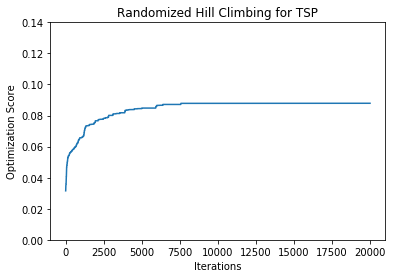

In [78]:
plt.plot(rhcT)
plt.xlabel("Iterations")
plt.ylabel("Optimization Score")
plt.title("Randomized Hill Climbing for TSP")
plt.ylim(0,0.14)

(0, 0.14)

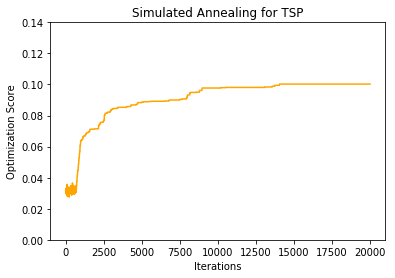

In [79]:
plt.plot(saT, color="orange")
plt.xlabel("Iterations")
plt.ylabel("Optimization Score")
plt.title("Simulated Annealing for TSP")
plt.ylim(0,0.14)

(0, 0.15)

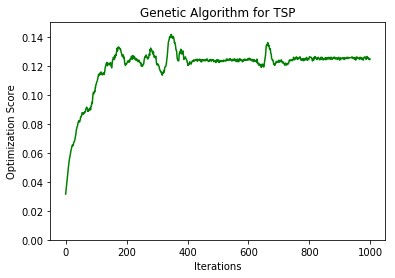

In [82]:
plt.plot(gaT, color="green")
plt.xlabel("Iterations")
plt.ylabel("Optimization Score")
plt.title("Genetic Algorithm for TSP")
plt.ylim(0,0.15)

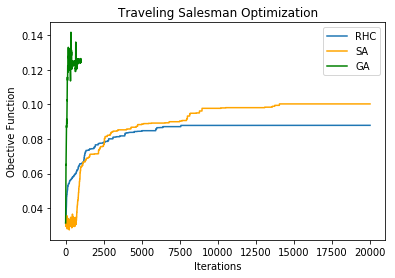

In [83]:
plt.plot(rhcT, label="RHC")
plt.plot(saT, color="orange", label="SA")
plt.plot(gaT, color="green", label="GA")
plt.xlabel("Iterations")
plt.ylabel("Obective Function")
plt.title("Traveling Salesman Optimization")
plt.legend()

Text(0.5,1,'Traveling Salesman Results')

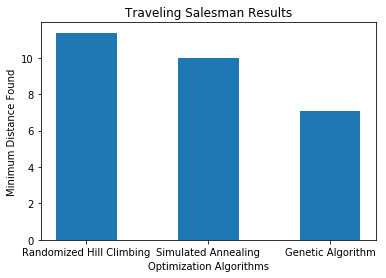

In [88]:
objects = ('Randomized Hill Climbing', 'Simulated Annealing', 'Genetic Algorithm')
y_pos = np.arange(len(objects))
performance = [1/max(rhcT), 1/max(saT), 1/max(gaT)]
plt.bar(y_pos, performance, 0.5, align='center', label='Training')
plt.xticks(y_pos, objects)
plt.xlabel('Optimization Algorithms')
plt.ylabel('Minimum Distance Found')
plt.title('Traveling Salesman Results')

**Continuous Peaks**

In [37]:
rhcC = np.genfromtxt("rhcCP.csv",delimiter=",")
saC = np.genfromtxt("saCP.csv",delimiter=",")
gaC = np.genfromtxt("gaCP.csv",delimiter=",")

(0, 200)

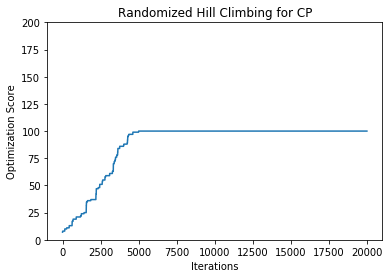

In [38]:
plt.plot(rhcC)
plt.xlabel("Iterations")
plt.ylabel("Optimization Score")
plt.title("Randomized Hill Climbing for CP")
plt.ylim(0,200)

(0, 200)

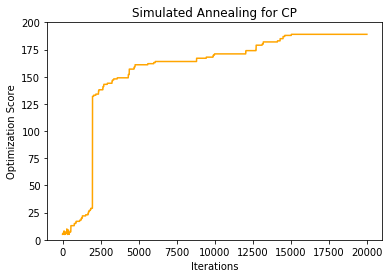

In [39]:
plt.plot(saC, color="orange")
plt.xlabel("Iterations")
plt.ylabel("Optimization Score")
plt.title("Simulated Annealing for CP")
plt.ylim(0,200)

(0, 200)

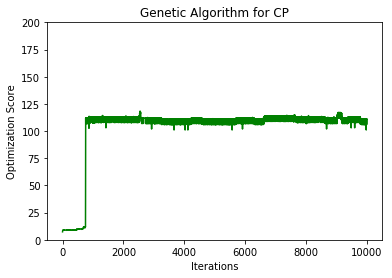

In [40]:
plt.plot(gaC, color="green")
plt.xlabel("Iterations")
plt.ylabel("Optimization Score")
plt.title("Genetic Algorithm for CP")
plt.ylim(0,200)

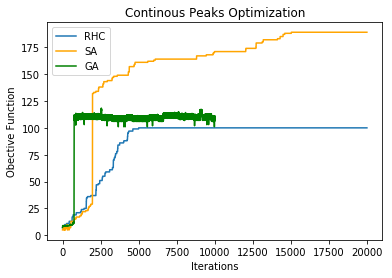

In [41]:
plt.plot(rhcC, label="RHC")
plt.plot(saC, color="orange", label="SA")
plt.plot(gaC, color="green", label="GA")
plt.xlabel("Iterations")
plt.ylabel("Obective Function")
plt.title("Continous Peaks Optimization")
plt.legend()